In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'


11490434/11490434 [==============================] - 3s 0us/step


In [2]:
print("Number of training images:", x_train.shape[0])
print("Number of testing images:", x_test.shape[0])
print("Image shape:", x_train.shape[1:])

Number of training images: 60000
Number of testing images: 10000
Image shape: (28, 28)


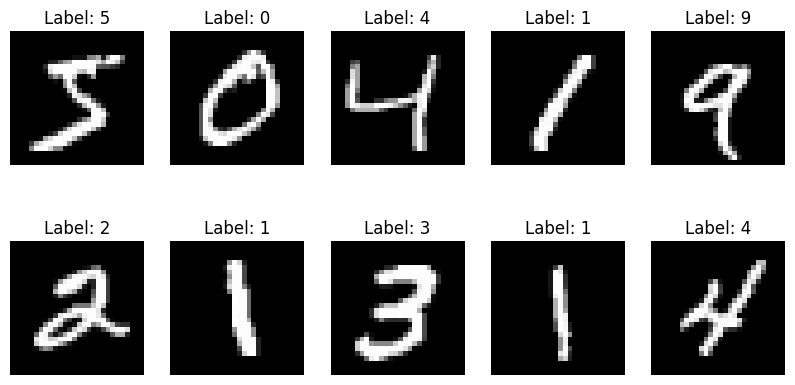

In [3]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# For ANN we need to flatten the images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Train the ANN
ann_history = ann_model.fit(x_train_flat, y_train, 
                            validation_data=(x_test_flat, y_test),
                            epochs=10, batch_size=32)



Epoch 1/10


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2372 - accuracy: 0.9300 - val_loss: 0.1232 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1000 - accuracy: 0.9699 - val_loss: 0.0870 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0692 - accuracy: 0.9785 - val_loss: 0.0931 - val_accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.0823 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 0.0866 - val_accuracy: 0.9728
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0984 - val_accuracy: 0.9722
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0790 - va

In [ ]:
# Reshape for CNN
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Train the CNN
cnn_history = cnn_model.fit(x_train_cnn, y_train,
                            validation_data=(x_test_cnn, y_test),
                            epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1256 - accuracy: 0.9617 - val_loss: 0.0389 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0297 - val_accuracy: 0.9885
Epoch 3/10
1447/1875 [======================>.......] - ETA: 8s - loss: 0.0264 - accuracy: 0.9916